# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-retardadores" data-toc-modified-id="Determinación-de-los-parámetros-de-los-retardadores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los retardadores</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4" data-toc-modified-id="Rotación-de-P4-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rotación de P4</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final</a></div>

# Determinación de los parámetros de los retardadores

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   14/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.

We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

\begin{equation}
P_L(0)=\left[\begin{array}{cc}
p_1 & 0  \\
0 & p_2
\end{array}\right]
\end{equation}

After this formalism, we pass to Mueller using Jones-Mueller Transformation

**Procedimiento**:

Se conocen los parámetros y ángulos de P1 y P4.

1. Se interpone la lámina retardadora R2

1. Se deja P1 en un ángulo fijo.

1. Se hace un doble bucle for para R2 y P4.

**Teoría**

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. 

**Resultado**

1. Posición del ángulo de R2.
1. Parámetros de R2



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

## Tarjeta de adquisición de datos

In [3]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [4]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

## Motores

In [6]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]


In [7]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



## Mover R2 y P4

In [8]:
# Move motor 1 to maximum position of laser diode
Vels=[150,150,150,150]

motors.move(
        positions=[0, 0, 0, 0], velocities=Vels, kind='absolute', verbose=False)
motors.get_position()
get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True);

current positions = ([ 0.], [-0.], [-0.], [ 0.])
1.1781, 

In [13]:
angle_2=sp.linspace(0,90,11)
angle_4=sp.linspace(0,180,15)
Angle_2, Angle_4 = sp.meshgrid(angle_2, angle_4)
intensities=sp.zeros_like(Angle_2,dtype=float)
print( intensities.shape)

(15L, 11L)


In [14]:
for i2, a2 in enumerate(angle_2):
    print('\n {:2}/{}: '.format(i2, len(angle_2)), end='' )
    for i4, a4 in enumerate(angle_4):
        motors.move(
            positions=[0, a2, 0, a4], velocities=Vels,  kind='absolute', verbose=False)
        intensities[i4, i2]=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)


  0/11: 0.8199, 0.8046, 0.7841, 0.7534, 0.7125, 0.6767, 0.6460, 0.6357, 0.6408, 0.6664, 0.7022, 0.7381, 0.7790, 0.8046, 0.8148, 
  1/11: 0.7278, 0.6562, 0.5999, 0.5743, 0.5743, 0.6101, 0.6613, 0.7278, 0.7995, 0.8558, 0.8813, 0.8762, 0.8506, 0.7943, 0.7227, 
  2/11: 0.7432, 0.5948, 0.4669, 0.3901, 0.3850, 0.4515, 0.5641, 0.7125, 0.8660, 0.9888, 1.0604, 1.0655, 1.0093, 0.8916, 0.7432, 
  3/11: 0.8609, 0.6306, 0.4311, 0.2724, 0.2161, 0.2622, 0.3901, 0.5948, 0.8199, 1.0297, 1.1781, 1.2395, 1.1986, 1.0604, 0.8660, 
  4/11: 1.0348, 0.7688, 0.4925, 0.2673, 0.1292, 0.1087, 0.2110, 0.4157, 0.6818, 0.9530, 1.1883, 1.3214, 1.3419, 1.2395, 1.0348, 
  5/11: 1.1986, 0.9427, 0.6460, 0.3645, 0.1547, 0.0575, 0.0933, 0.2571, 0.5078, 0.8046, 1.0911, 1.2958, 1.3879, 1.3572, 1.1935, 
  6/11: 1.2805, 1.0809, 0.8148, 0.5334, 0.2775, 0.1240, 0.0780, 0.1701, 0.3697, 0.6357, 0.9223, 1.1730, 1.3316, 1.3674, 1.2805, 
  7/11: 1.2549, 1.1321, 0.9325, 0.6920, 0.4566, 0.2724, 0.1854, 0.2008, 0.3185, 0.5232, 0.7688, 

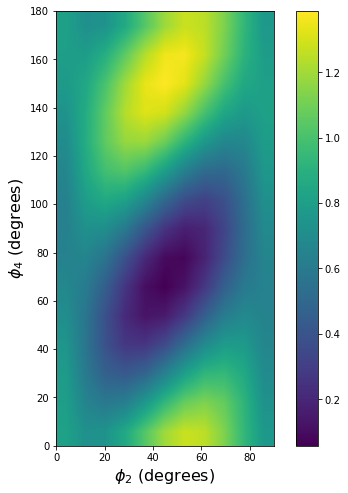

In [15]:
filename="step4_R2_parameters_{}".format(datetime.date.today())


plt.figure(figsize=(8,8))
plt.imshow(intensities,
            interpolation='bilinear',
                      aspect='auto',
            origin='lower',extent=[angle_2[0], angle_2[-1], angle_4[0], angle_4[-1]])
plt.xlabel('$\phi_2$ (degrees)', fontsize=16)
plt.ylabel('$\phi_4$ (degrees)', fontsize=16)
plt.axis('scaled')
plt.colorbar(orientation='vertical')
plt.savefig(filename+'.pdf')

In [23]:

data=dict(angle_2=angle_2, angle_4=angle_4, intensities=intensities)
data2=np.zeros((len(angle_4),len(angle_2), 3),dtype=float)
data2[:,:,0]=Angle_2
data2[:,:,1]=Angle_4
data2[:,:,2]=intensities
np.save(filename+'.npy', data2)
savemat(filename+'.mat', data, oned_as='row')

## Final

In [22]:
motors.close()
del motors
LabJackPython.Close()